# Run Time

In [1]:
import jenn
import time 
import matplotlib.pyplot as plt 

### Support Functions

In [2]:
def timeit(samples: int, width: int = 10, depth: int = 1): 
    """Return elapsed time"""
    x_train, y_train, dydx_train = jenn.synthetic.Rastrigin.sample(
        m_lhs=samples, 
        m_levels=0,
        lb = (-1.0, -1.0),
        ub = (1.5, 1.5),
    )
    tic = time.time()
    model = jenn.model.NeuralNet(
        layer_sizes=[2] + [width] * depth + [1],
    ).fit(
        x=x_train, 
        y=y_train, 
        dydx=dydx_train, 
        max_iter=200, 
        alpha=0.05, 
        lambd=0.0001, 
        is_normalize=True, 
        is_verbose=False, 
    )
    toc = time.time()
    return toc - tic 

In [3]:
def plot(x: list, y: list, xlabel: str, ylabel: str, fontsize: str = 9):
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.25))
    ax.plot(x, y, "o-")
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.grid("on")
    ax.plot((x[0], x[-1]), (min(y), max(y)), '--')
    ax.legend(["data", "O(n)"], fontsize=fontsize)
    plt.close(fig)
    return fig

### Elapsed Time vs. Number of Samples

In [4]:
counts = [10_000, 25_000, 50_000, 75_000, 100_000, 125_000]
elapsed_times = [timeit(samples=count, width=25, depth=2) for count in counts]

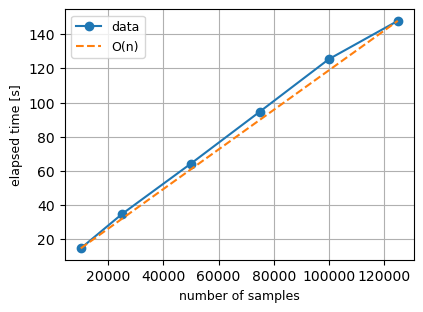

In [5]:
time_vs_samples = plot(x=counts, y=elapsed_times, xlabel="number of samples", ylabel="elapsed time [s]")
time_vs_samples

### Elapsed Time vs. Number of Layers

In [6]:
depths = [1, 3, 5, 7, 9, 11, 13, 15]
elapsed_times = [timeit(samples=1_000, width=25, depth=depth) for depth in depths]

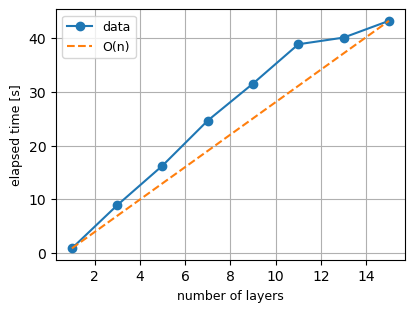

In [7]:
time_vs_layers = plot(x=depths, y=elapsed_times, xlabel="number of layers", ylabel="elapsed time [s]")
time_vs_layers

### Elapsed Time vs. Number of Neurons 

In [8]:
widths = list(range(10, 101, 10)) + list(range(100, 1000, 100))
elapsed_times = [timeit(samples=1_000, width=width, depth=2) for width in widths]

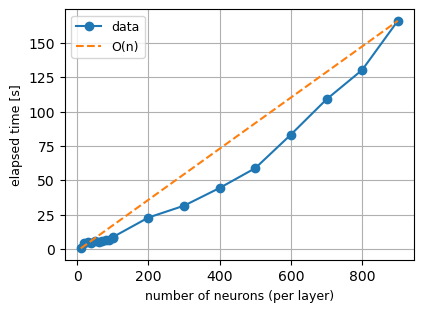

In [9]:
time_vs_neurons = plot(x=widths, y=elapsed_times, xlabel="number of neurons (per layer)", ylabel="elapsed time [s]")
time_vs_neurons

_Save figures_

In [15]:
time_vs_samples.savefig("runtime_vs_samples.pdf", format="pdf")
time_vs_layers.savefig("runtime_vs_layers.pdf", format="pdf")
time_vs_neurons.savefig("runtime_vs_neurons.pdf", format="pdf")